In [2]:
#import the packages 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
#read the data 
df = pd.read_csv(r"C:\Users\venkatachalam\Desktop\credit card fraudulent\creditcard.csv")
print(df.tail())
print(df.head())

            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  

In [4]:
#describe the data
print(df.shape)
print(df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [5]:
fraud = df[df['Class'] == 1]
proper_transactions = df[df['Class'] == 0]
percent = len(fraud) / len((fraud + proper_transactions))
print(percent)
print("FRAUDULENT TRANSACTIONS", len(fraud))
print("PROPER TRANSACTIONS", len(proper_transactions))

0.001727485630620034
FRAUDULENT TRANSACTIONS 492
PROPER TRANSACTIONS 284315


In [6]:
print("DETAILS OF THE FRAUDULENT CASES",fraud.Amount.describe())

DETAILS OF THE FRAUDULENT CASES count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [7]:
print("DETAILS OF THE PROPER TRANSACTIONS", proper_transactions.Amount.describe())

DETAILS OF THE PROPER TRANSACTIONS count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [8]:
#finding the correlation with different methods
print("PEARSON METHOD",df.corr(method = 'pearson'))
print("SPEARMAN METHOD",df.corr(method = 'spearman'))
print("KENDALL METHOD",df.corr(method = 'kendall'))

PEARSON METHOD             Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16 

SPEARMAN METHOD             Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.190647 -0.006419 -0.473348 -0.142156  0.226004 -0.111408   
V1      0.190647  1.000000 -0.384328 -0.412095  0.101011 -0.106632 -0.086561   
V2     -0.006419 -0.384328  1.000000  0.073967  0.155042  0.342701 -0.110393   
V3     -0.473348 -0.412095  0.073967  1.000000  0.060812 -0.223849  0.171263   
V4     -0.142156  0.101011  0.155042  0.060812  1.000000  0.021367  0.075185   
V5      0.226004 -0.106632  0.342701 -0.223849  0.021367  1.000000 -0.007577   
V6     -0.111408 -0.086561 -0.110393  0.171263  0.075185 -0.007577  1.000000   
V7      0.116722 -0.227650  0.426320 -0.074582  0.059920  0.431573 -0.292680   
V8     -0.103882 -0.236140  0.006980  0.164374 -0.009608 -0.057022  0.444053   
V9      0.017986  0.138614 -0.077880 -0.030876  0.105248 -0.056580  0.028864   
V10     0.014692  0.231636 -0.212437 -0.070960  0.025553 -0.154910  0.063326   
V11    -0.227116  0.0137

<function matplotlib.pyplot.show(*args, **kw)>

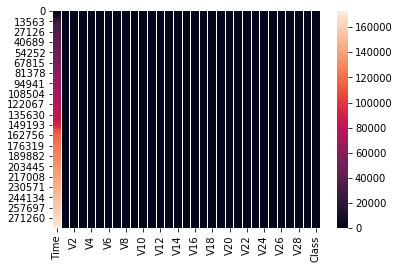

In [9]:
#plot the graphs using seaborn
#HEAT MAP
heat_map = sns.heatmap(df)
plt.show

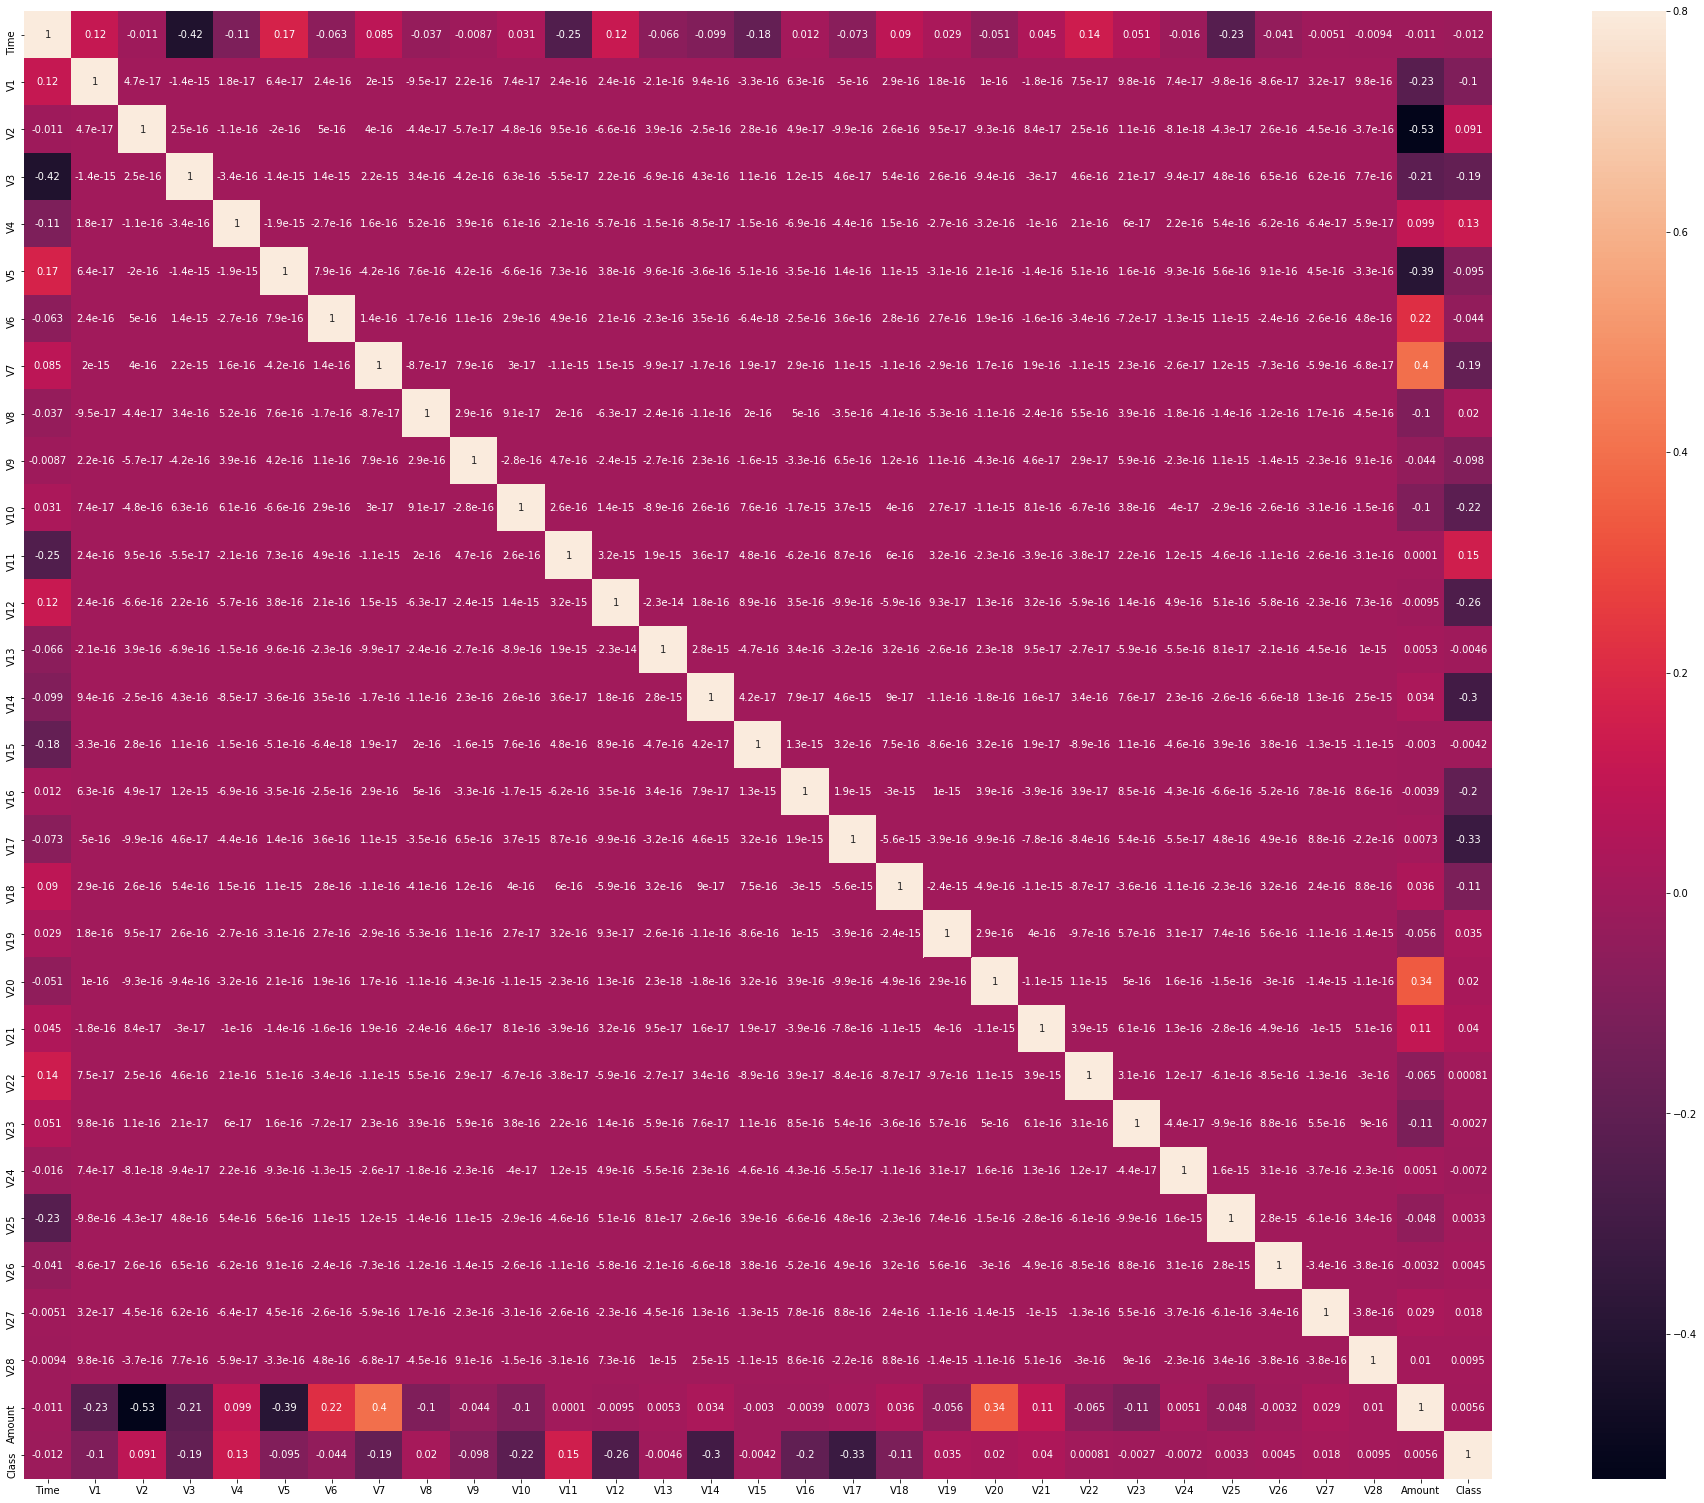

In [10]:
#when annot fnc is used the ticks show the values of each of them
corrmat = df.corr() 
fig = plt.figure(figsize = (36, 27)) 
sns.heatmap(corrmat,annot = True,vmax = .8, square = True) 
plt.show()

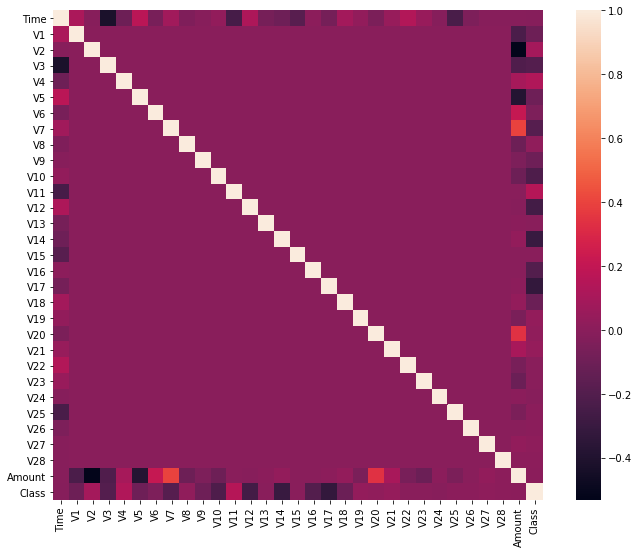

In [11]:
#simplified graph where the vmax and vmin describe the color bar representation
corrmat = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = 1, square = True) 
plt.show() 
#In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features 
#that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively 
#correlated with the feature called Amount. We also see some correlation with V20 and Amount. 
#wThis gives us a deeper understanding of the Data available to us.

In [14]:
x = df.drop(["Class"], axis= 1)
y = df["Class"]
print("x", x)
print("y", y)
print("shape of x",x.shape)
print("shape pf y",y.shape)
print("values of x",x.values)
print("values of y",y.values)

x             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.251

In [16]:
#training and testing the data with skicitlearn 
from sklearn.model_selection import train_test_split
xData = x.values
yData = y.values
x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size = 0.2, train_size = 0.8, random_state = 42)

In [17]:
#use random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_Pred = rfc.predict(x_test)

In [21]:
#import parameters from the metrics of sklearn
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_fraudulent = len(fraud)
n_errors = (y_Pred != y_test).sum()
print("The model used is Random Forest CLassifier")
acc = accuracy_score(y_test, y_Pred)
print("The accuracy score is {}".format(acc))
pres = precision_score(y_test, y_Pred)
print("The precision score is {}".format(pres))
recs = recall_score(y_test, y_Pred)
print("The recall score {}".format(recs))
f1 = f1_score(y_test, y_Pred)
print("The f1 score is {}".format(f1))
corrcoef = matthews_corrcoef(y_test, y_Pred)
print("The matthews correlation coefficient is {}".format(corrcoef))

The model used is Random Forest CLassifier
The accuracy score is 0.9995611109160493
The precision score is 0.974025974025974
The recall score 0.7653061224489796
The f1 score is 0.8571428571428571
The matthews correlation coefficient is 0.8631826952924256


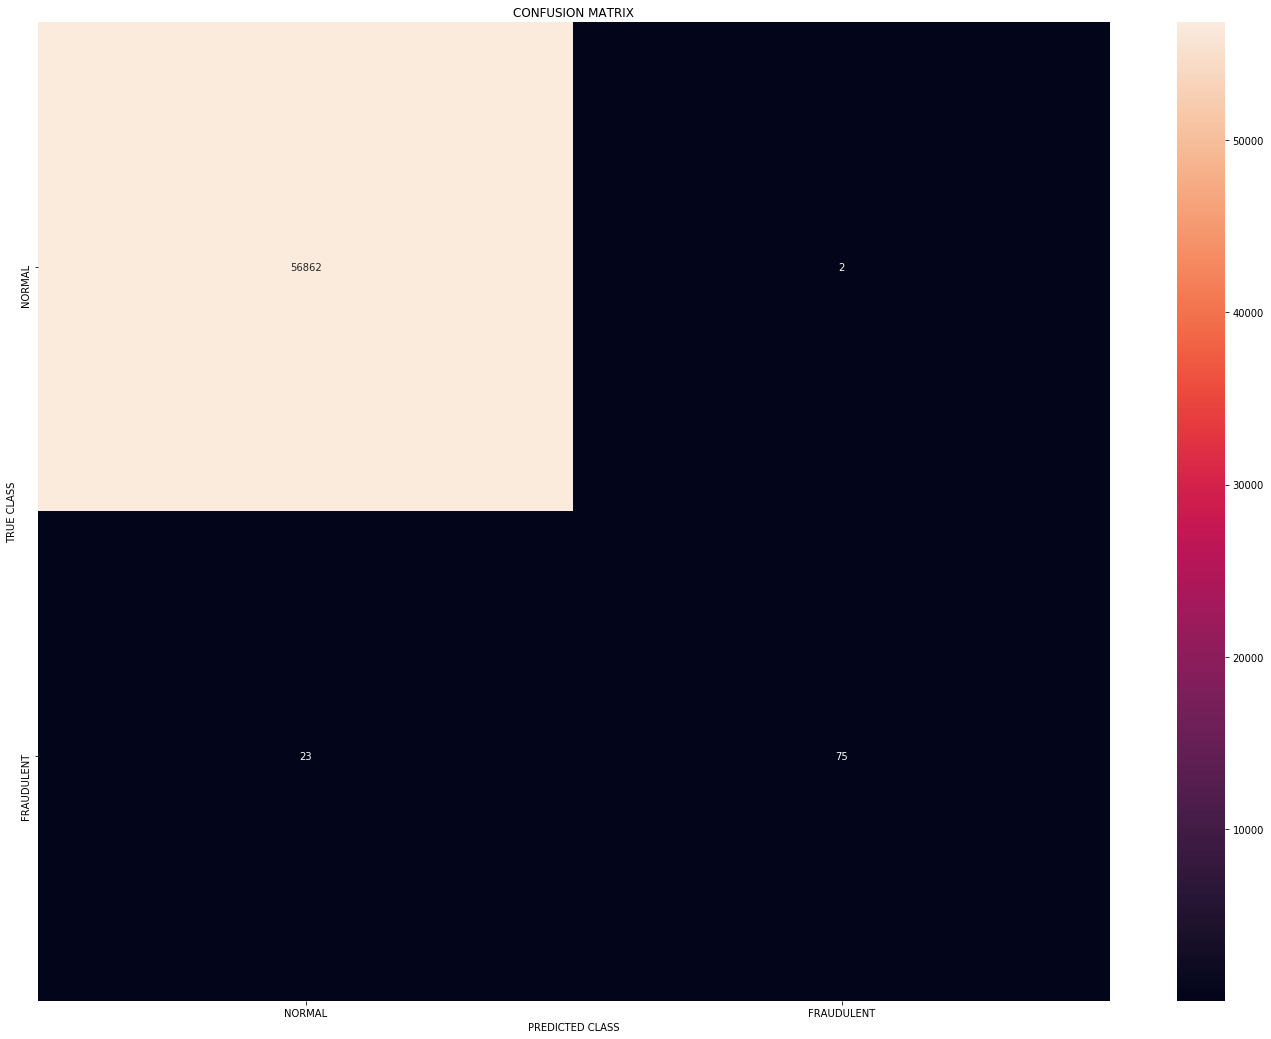

In [22]:
#The confusion matrix to know more: refer greeks of geeks confusion matrix
LABELS = ["NORMAL", "FRAUDULENT"]
conf_mat = confusion_matrix(y_test,y_Pred)
plt.figure(figsize = (24,18))
sns.heatmap(conf_mat, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = 'd' )
plt.title("CONFUSION MATRIX")
plt.xlabel("PREDICTED CLASS")
plt.ylabel("TRUE CLASS")
plt.show()